# Environment Setup

## Library Setup

In [251]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings('ignore')

## Daset Setup

In [252]:
dfCustomer = pd.read_csv('Dataset/Case Study - Customer.csv', sep= ';')
dfProduct = pd.read_csv('Dataset/Case Study - Product.csv', sep= ';')
dfStore = pd.read_csv('Dataset/Case Study - Store.csv', sep= ';')
dfTransaction = pd.read_csv('Dataset/Case Study - Transaction.csv', sep= ';')

# Exploratory Data Analysis

## Function

In [253]:
def statisticDescription (data):
    print('5 Data Sample :')
    print(data.head(5))
    print('\n\n\nInformation Data :')
    print(data.info())
    print('\n\n\nData Shape : \n', data.shape)
    print('\n\n\nMissing Value Total : \n', data.isna().sum())
    print('\n\n\nDuplicate Value Total : \n', data.duplicated().sum())
    print('\n\n\nDescriptive Statistic :')
    return data.describe(include='all')

## Customer

In [254]:
statisticDescription(dfCustomer)

5 Data Sample :
   CustomerID  Age  Gender Marital Status Income
0           1   55       1        Married   5,12
1           2   60       1        Married   6,23
2           3   32       1        Married   9,17
3           4   31       1        Married   4,87
4           5   58       1        Married   3,57



Information Data :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB
None



Data Shape : 
 (447, 5)



Missing Value Total : 
 CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64



Duplicate Value Total : 
 0




,CustomerID,Age,Gender,Marital Status,Income
count,447.000000,447.000000,447.000000,444,447
unique,NaN,NaN,NaN,2,369
top,NaN,NaN,NaN,Married,0
freq,NaN,NaN,NaN,340,16
mean,224.000000,39.782998,0.458613,NaN,NaN
std,129.182042,12.848719,0.498842,NaN,NaN
min,1.000000,0.000000,0.000000,NaN,NaN
25%,112.500000,30.000000,0.000000,NaN,NaN
50%,224.000000,39.000000,0.000000,NaN,NaN
75%,335.500000,50.500000,1.000000,NaN,NaN


## Product

In [255]:
statisticDescription(dfProduct)

5 Data Sample :
  ProductID   Product Name  Price
0        P1      Choco Bar   8800
1        P2  Ginger Candy    3200
2        P3       Crackers   7500
3        P4    Potato Chip  12000
4        P5       Thai Tea   4200



Information Data :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 372.0+ bytes
None



Data Shape : 
 (10, 3)



Missing Value Total : 
 ProductID       0
Product Name    0
Price           0
dtype: int64



Duplicate Value Total : 
 0



Descriptive Statistic :


,ProductID,Product Name,Price
count,10,10,10.000000
unique,10,10,NaN
top,P1,Choco Bar,NaN
freq,1,1,NaN
mean,NaN,NaN,10410.000000
std,NaN,NaN,4890.455557
min,NaN,NaN,3200.000000
25%,NaN,NaN,7825.000000
50%,NaN,NaN,9700.000000
75%,NaN,NaN,14250.000000


## Store

In [256]:
statisticDescription(dfStore)

5 Data Sample :
   StoreID         StoreName GroupStore           Type   Latitude   Longitude
0        1     Prima Tendean      Prima   Modern Trade       -6,2  106,816666
1        2  Prima Kelapa Dua      Prima   Modern Trade  -6,914864  107,608238
2        3        Prima Kota      Prima   Modern Trade  -7,797068  110,370529
3        4       Gita Ginara       Gita  General Trade  -6,966667  110,416664
4        5           Bonafid       Gita  General Trade  -7,250445  112,768845



Information Data :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 804.0+ bytes
None



Data Shap

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
count,14.0000,14,14,14,14,14
unique,NaN,12,7,2,14,14
top,NaN,Lingga,Prima,General Trade,"-6,2","106,816666"
freq,NaN,2,3,8,1,1
mean,7.5000,NaN,NaN,NaN,NaN,NaN
std,4.1833,NaN,NaN,NaN,NaN,NaN
min,1.0000,NaN,NaN,NaN,NaN,NaN
25%,4.2500,NaN,NaN,NaN,NaN,NaN
50%,7.5000,NaN,NaN,NaN,NaN,NaN
75%,10.7500,NaN,NaN,NaN,NaN,NaN


## Transaction

In [257]:
statisticDescription(dfTransaction)

5 Data Sample :
  TransactionID  CustomerID        Date ProductID  Price  Qty  TotalAmount  \
0       TR11369         328  01/01/2022        P3   7500    4        30000   
1       TR16356         165  01/01/2022        P9  10000    7        70000   
2        TR1984         183  01/01/2022        P1   8800    4        35200   
3       TR35256         160  01/01/2022        P1   8800    7        61600   
4       TR41231         386  01/01/2022        P9  10000    1        10000   

   StoreID  
0       12  
1        1  
2        4  
3        4  
4        4  



Information Data :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
count,5020,5020.000000,5020,5020,5020.000000,5020.000000,5020.000000,5020.000000
unique,4908,NaN,365,10,NaN,NaN,NaN,NaN
top,TR71313,NaN,02/03/2022,P5,NaN,NaN,NaN,NaN
freq,3,NaN,31,814,NaN,NaN,NaN,NaN
mean,NaN,221.263745,NaN,NaN,9684.800797,3.644622,32279.482072,7.489841
std,NaN,129.672955,NaN,NaN,4600.708780,1.855295,19675.462455,4.028502
min,NaN,1.000000,NaN,NaN,3200.000000,1.000000,7500.000000,1.000000
25%,NaN,108.000000,NaN,NaN,4200.000000,2.000000,16000.000000,4.000000
50%,NaN,221.000000,NaN,NaN,9400.000000,3.000000,28200.000000,7.000000
75%,NaN,332.000000,NaN,NaN,15000.000000,5.000000,47000.000000,11.000000


# Merge Data

In [258]:
df = pd.merge(dfTransaction, dfCustomer, on='CustomerID', how='inner')
df2 = pd.merge(df, dfStore, on = 'StoreID', how = 'inner')
dfMerged = pd.merge(df2, dfProduct, on = 'ProductID', how = 'inner')
dfMerged.drop(columns = "Price_y", inplace = True)
statisticDescription(dfMerged)

5 Data Sample :
  TransactionID  CustomerID        Date ProductID  Price_x  Qty  TotalAmount  \
0       TR11369         328  01/01/2022        P3     7500    4        30000   
1       TR89318         183  17/07/2022        P3     7500    1         7500   
2        TR9106         123  26/09/2022        P3     7500    4        30000   
3        TR4331         335  08/01/2022        P3     7500    3        22500   
4        TR6445         181  10/01/2022        P3     7500    4        30000   

   StoreID  Age  Gender Marital Status Income       StoreName GroupStore  \
0       12   36       0        Married  10,53  Prestasi Utama   Prestasi   
1       12   27       1         Single   0,18  Prestasi Utama   Prestasi   
2       12   34       0        Married   4,36  Prestasi Utama   Prestasi   
3       12   29       1         Single   4,74  Prestasi Utama   Prestasi   
4       12   33       1        Married   9,94  Prestasi Utama   Prestasi   

            Type   Latitude   Longitude Produc

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,StoreName,GroupStore,Type,Latitude,Longitude,Product Name
count,5020,5020.000000,5020,5020,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,4976,5020,5020,5020,5020,5020,5020,5020
unique,4908,NaN,365,10,NaN,NaN,NaN,NaN,NaN,NaN,2,369,12,7,2,14,14,10
top,TR71313,NaN,02/03/2022,P5,NaN,NaN,NaN,NaN,NaN,NaN,Married,0,Lingga,Prima,General Trade,"-3,654703","128,190643",Thai Tea
freq,3,NaN,31,814,NaN,NaN,NaN,NaN,NaN,NaN,3779,185,738,1085,2851,370,370,814
mean,NaN,221.263745,NaN,NaN,9684.800797,3.644622,32279.482072,7.489841,40.003586,0.452988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,129.672955,NaN,NaN,4600.708780,1.855295,19675.462455,4.028502,12.834719,0.497835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,3200.000000,1.000000,7500.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,108.000000,NaN,NaN,4200.000000,2.000000,16000.000000,4.000000,30.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,221.000000,NaN,NaN,9400.000000,3.000000,28200.000000,7.000000,39.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,332.000000,NaN,NaN,15000.000000,5.000000,47000.000000,11.000000,51.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Handling Missing Value

In [259]:
print('Perbandingan missing value ',round((dfMerged['Marital Status'].isna().sum()/dfMerged.shape[0])*100, 2),'% dari total data')

dfMerged.dropna(inplace = True)
dfMerged.isna().sum()

Perbandingan missing value  0.88 % dari total data


TransactionID     0
CustomerID        0
Date              0
ProductID         0
Price_x           0
Qty               0
TotalAmount       0
StoreID           0
Age               0
Gender            0
Marital Status    0
Income            0
StoreName         0
GroupStore        0
Type              0
Latitude          0
Longitude         0
Product Name      0
dtype: int64

# Data Transformation

In [260]:
dfMerged['Date'] = pd.to_datetime(dfMerged['Date'], format='%d/%m/%Y')

dfMerged['Date'].head() 

0   2022-01-01
1   2022-07-17
2   2022-09-26
3   2022-01-08
4   2022-01-10
Name: Date, dtype: datetime64[ns]

# Arima Regression Prediction (Forecasting)

## Data Preparation

In [261]:
targetRegression = dfMerged.groupby('Date').agg({'Qty': 'sum'}).reset_index()

targetRegression.head()

,Date,Qty
0,2022-01-01,49
1,2022-01-02,59
2,2022-01-03,63
3,2022-01-04,45
4,2022-01-05,28


In [262]:
print(targetRegression.shape)

(365, 2)


## Stationarity Check

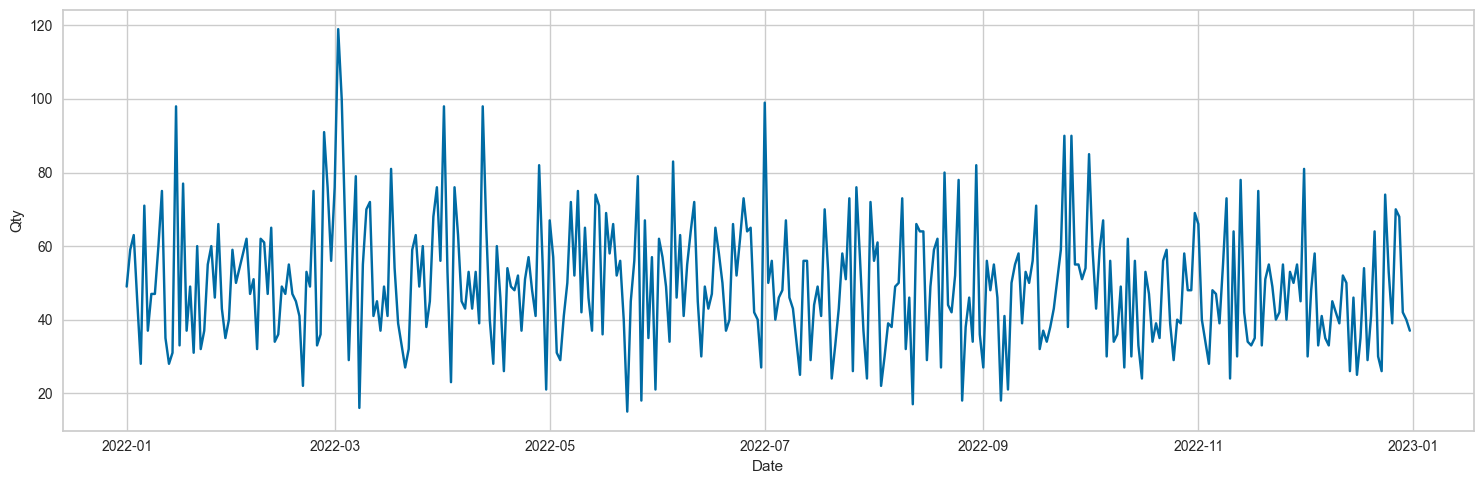

In [263]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(x = 'Date', y = 'Qty', data = targetRegression)
plt.tight_layout()

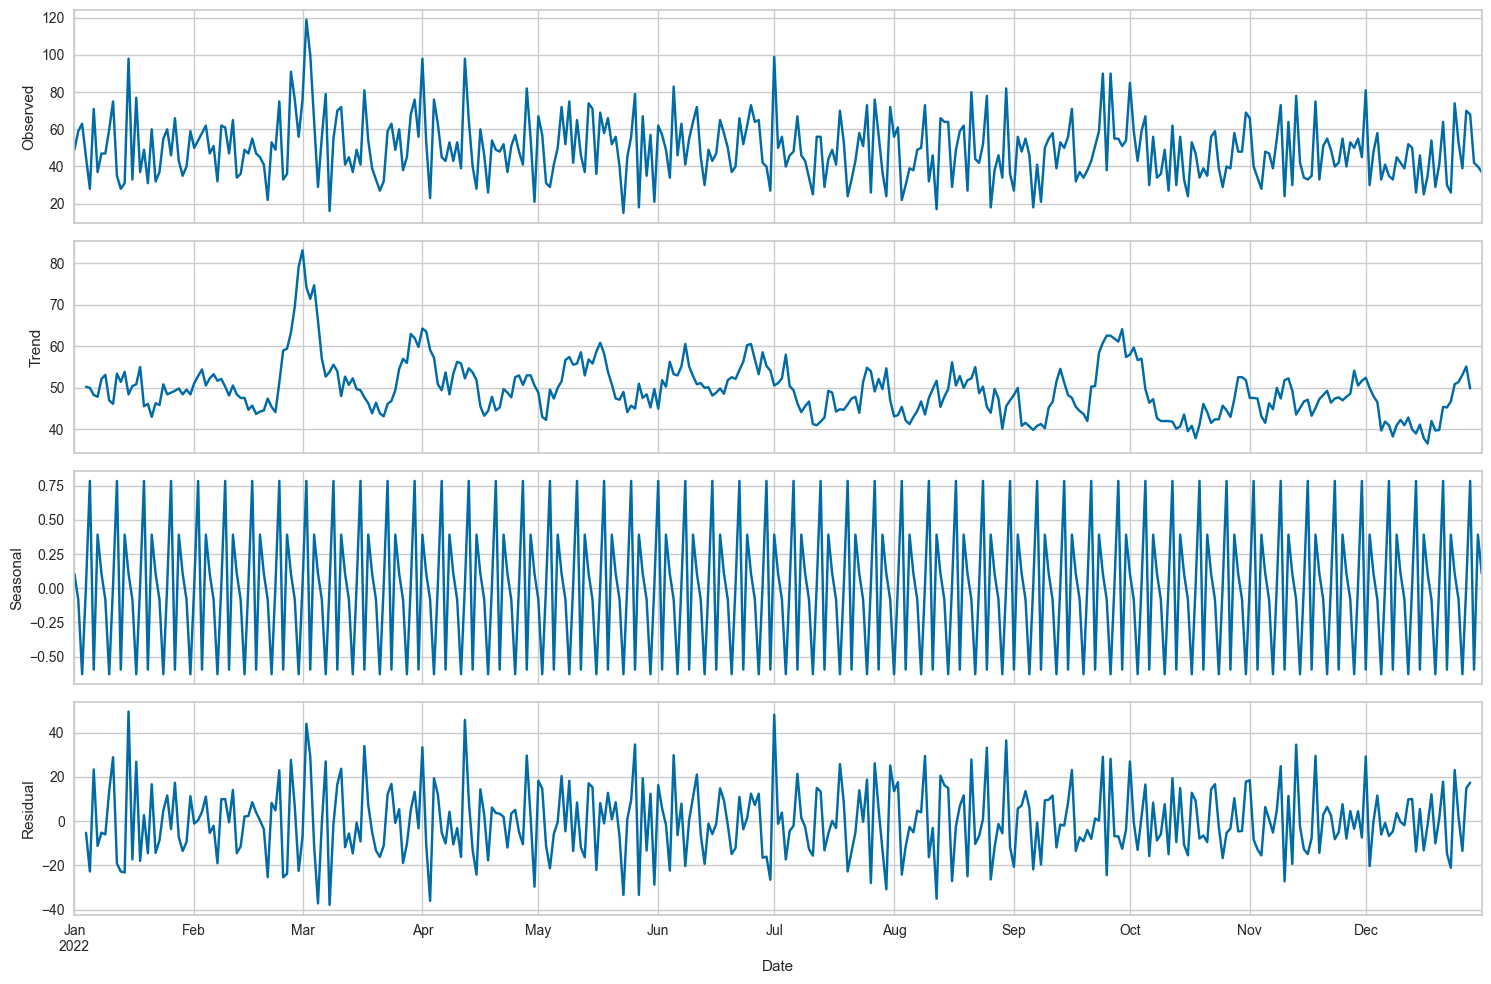

In [264]:
targetRegressionIdx = targetRegression.set_index('Date')
regresi_decomposition = seasonal_decompose(targetRegressionIdx)

# Plot the decomposition results
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (15, 10), sharex = True)
regresi_decomposition.observed.plot(ax = ax1)
ax1.set_ylabel('Observed')
regresi_decomposition.trend.plot(ax = ax2)
ax2.set_ylabel('Trend')
regresi_decomposition.seasonal.plot(ax = ax3)
ax3.set_ylabel('Seasonal')
regresi_decomposition.resid.plot(ax = ax4)
ax4.set_ylabel('Residual')

plt.tight_layout()

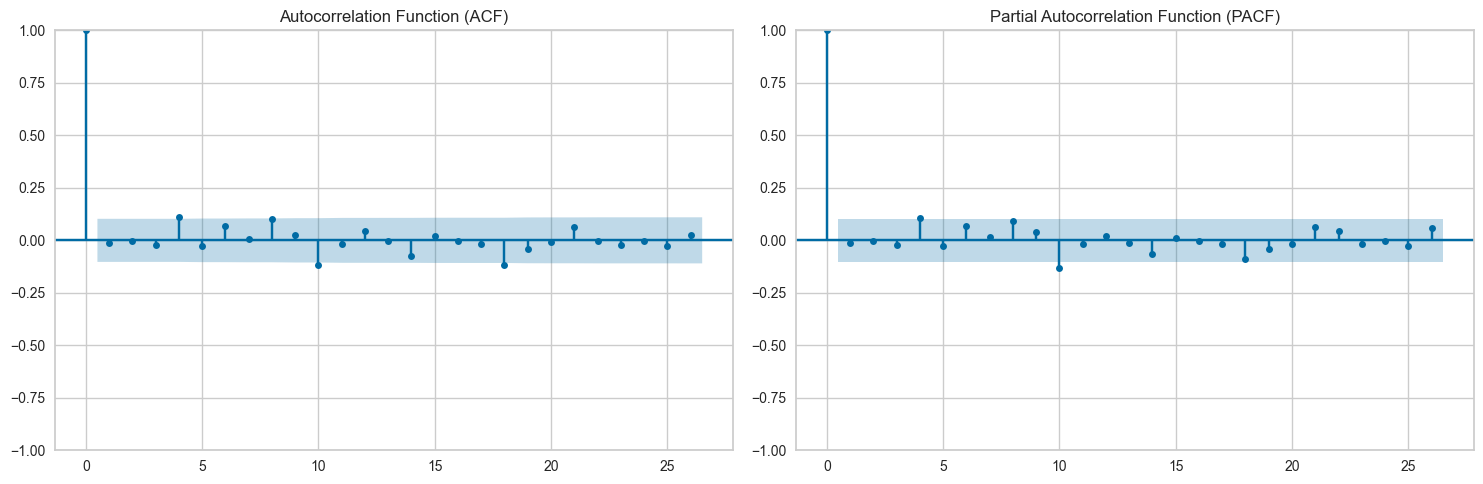

In [265]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))

plot_acf(targetRegression['Qty'], ax = ax[0])
ax[0].set_title('Autocorrelation Function (ACF)')

plot_pacf(targetRegression['Qty'], ax = ax[1])
ax[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()

In [266]:
checkStationery = adfuller(targetRegression['Qty'], autolag = 'AIC')

print("1. ADF : ",checkStationery[0])
print("2. P-Value : ", checkStationery[1])
print("3. Num Of Lags : ", checkStationery[2])
print("4. Num Of Observations Used For ADF Regression:", checkStationery[3])
print("5. Critical Values :")
for key, val in checkStationery[4].items():
    print("\t",key, ": ", val)

alpha = 0.05
if checkStationery[1] <= alpha:
    print('\n\nThe data is stationary')
    print(checkStationery[1])
else:
    print('\n\nThe data is not stationary')
    print(checkStationery[1])

1. ADF :  -19.24830156679947
2. P-Value :  0.0
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 364
5. Critical Values :
	 1% :  -3.4484434475193777
	 5% :  -2.869513170510808
	 10% :  -2.571017574266393


The data is stationary
0.0


## Splitting Dataset

In [267]:
train_size = int(len(targetRegression) * 0.8)
train_data, test_data = targetRegression.iloc[:train_size], targetRegression.iloc[train_size:]

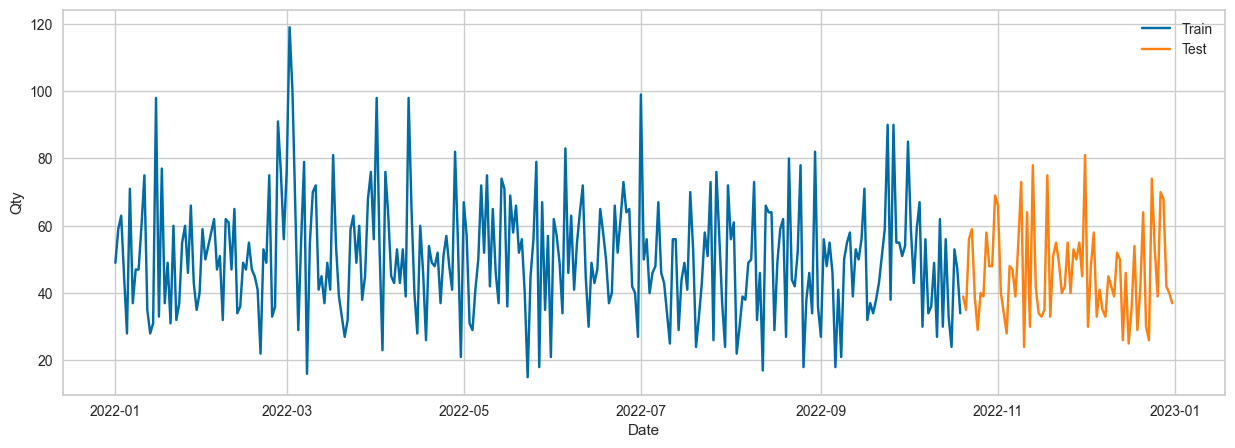

In [268]:
plt.figure(figsize=(15,5))
sns.lineplot(data=train_data, x='Date', y='Qty', label='Train')
sns.lineplot(data=test_data, x='Date', y='Qty', label='Test')
plt.legend()

In [269]:
print(train_data)

          Date  Qty
0   2022-01-01   49
1   2022-01-02   59
2   2022-01-03   63
3   2022-01-04   45
4   2022-01-05   28
..         ...  ...
287 2022-10-15   33
288 2022-10-16   24
289 2022-10-17   53
290 2022-10-18   47
291 2022-10-19   34

[292 rows x 2 columns]


In [270]:
print(test_data)

          Date  Qty
292 2022-10-20   39
293 2022-10-21   35
294 2022-10-22   56
295 2022-10-23   59
296 2022-10-24   39
..         ...  ...
360 2022-12-27   70
361 2022-12-28   68
362 2022-12-29   42
363 2022-12-30   40
364 2022-12-31   37

[73 rows x 2 columns]


## Determine Model & Best Paramter
(ARI, ARIMA, IMA)

In [271]:
from itertools import product
p = range(4)
q = range(4)
d = range(1)
pdq = list(product(p, d, q))
print(pdq)

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 0, 3), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 0, 3), (3, 0, 0), (3, 0, 1), (3, 0, 2), (3, 0, 3)]


In [272]:
aic_scores = []
for param in pdq:
    model = ARIMA(train_data['Qty'], order=param)
    model_fit = model.fit()
    aic_scores.append({'Parameter': param, 'AIC Score': model_fit.aic})
    print(model_fit.summary())


best_aic = min(aic_scores, key=lambda x: x['AIC Score'])
print('\n\n\n Best Model : ',best_aic)

                               SARIMAX Results                                
Dep. Variable:                    Qty   No. Observations:                  292
Model:                          ARIMA   Log Likelihood               -1245.668
Date:                Sun, 03 Sep 2023   AIC                           2495.336
Time:                        12:26:46   BIC                           2502.689
Sample:                             0   HQIC                          2498.281
                                - 292                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.5719      1.076     46.991      0.000      48.463      52.681
sigma2       297.1145     22.905     12.971      0.000     252.221     342.008
Ljung-Box (L1) (Q):                   0.02   Jarque-

In [273]:
def rmse(y_actual, y_pred):
  print(f'RMSE Value: {mean_squared_error(y_actual, y_pred)**0.5}')
def rsquare(y_actual, y_pred):
  print(f'R-squared Value: {r2_score(y_actual, y_pred)}')
def eval(y_actual, y_pred):
  rmse(y_actual, y_pred)
  rsquare(y_actual, y_pred)
  print(f'MAE Value: {mean_absolute_error(y_actual, y_pred)}')

## Train Testing Model

In [274]:
order = (2,0,2)
model = ARIMA(train_data['Qty'], order = order)
fit_qty = model.fit()

print(fit_qty.summary())

                               SARIMAX Results                                
Dep. Variable:                    Qty   No. Observations:                  292
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1238.873
Date:                Sun, 03 Sep 2023   AIC                           2489.747
Time:                        12:26:53   BIC                           2511.807
Sample:                             0   HQIC                          2498.583
                                - 292                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.6149      1.091     46.386      0.000      48.476      52.754
ar.L1         -1.8654      0.028    -65.728      0.000      -1.921      -1.810
ar.L2         -0.9382      0.028    -33.044      0.0

RMSE Value: 14.475496491318099
R-squared Value: -0.09919660124474472
MAE Value: 12.379609140354756


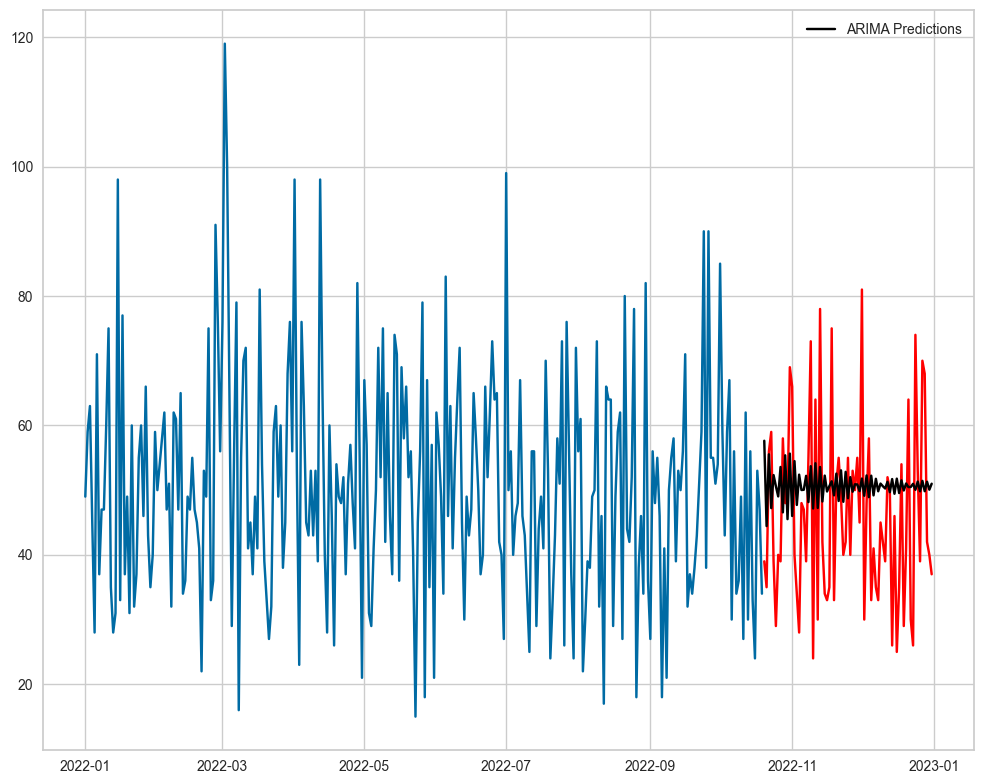

In [275]:
# ARIMA (0,0,0) Seasonal (0,1,1,7)
df_train = train_data.set_index('Date')
df_test = test_data.set_index('Date')

y_pred = fit_qty.get_forecast(len(df_test))

y_pred_df = y_pred.conf_int()
y_pred_df['predictions'] = fit_qty.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = df_test.index
y_pred_out = y_pred_df['predictions']

eval(df_test['Qty'], y_pred_out)

plt.figure(figsize = (10,8))
plt.plot(df_train['Qty'])
plt.plot(df_test['Qty'], color = 'red')
plt.plot(y_pred_out, color = 'black', label = 'ARIMA Predictions')
plt.legend()

plt.tight_layout()

## Forecasting

In [276]:
forecast_length = 31
forecast_result = fit_qty.get_forecast(forecast_length)
forecast_result_arima = forecast_result.conf_int()
forecast_result_arima['forecasted Qty'] = fit_qty.predict(start = forecast_result_arima.index[0],
                                                      end = forecast_result_arima.index[-1])
forecast_result_arima['Date'] = pd.date_range(start = '2023-01-01', end = '2023-01-31')
forecast_result_arima.set_index('Date', inplace = True)
forecast_result_arima.head()

,lower Qty,upper Qty,forecasted Qty
Date,,,
2023-01-01,24.802709,90.459143,57.630926
2023-01-02,11.602426,77.295797,44.449111
2023-01-03,22.686558,88.381626,55.534092
2023-01-04,14.370231,80.075998,47.223114
2023-01-05,19.446978,85.206358,52.326668


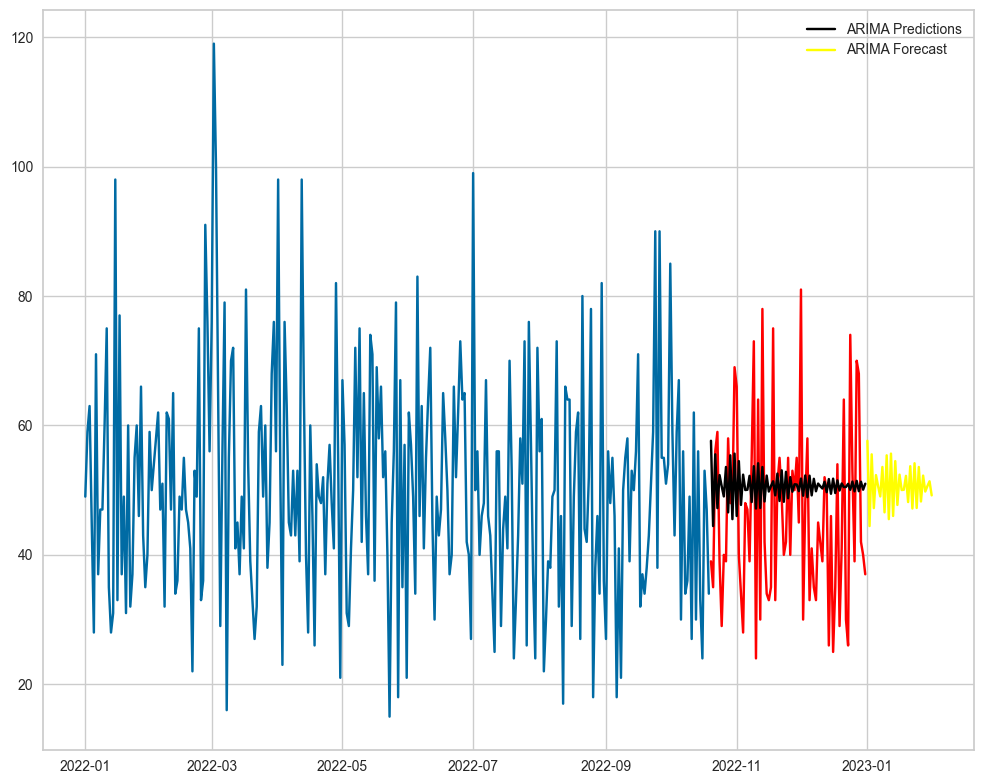

In [277]:
plt.figure(figsize = (10,8))
plt.plot(df_train['Qty'])
plt.plot(df_test['Qty'], color = 'red')
plt.plot(y_pred_out, color = 'black', label = 'ARIMA Predictions')
plt.plot(forecast_result_arima['forecasted Qty'], color = 'yellow', label = 'ARIMA Forecast')
plt.legend()

plt.tight_layout()

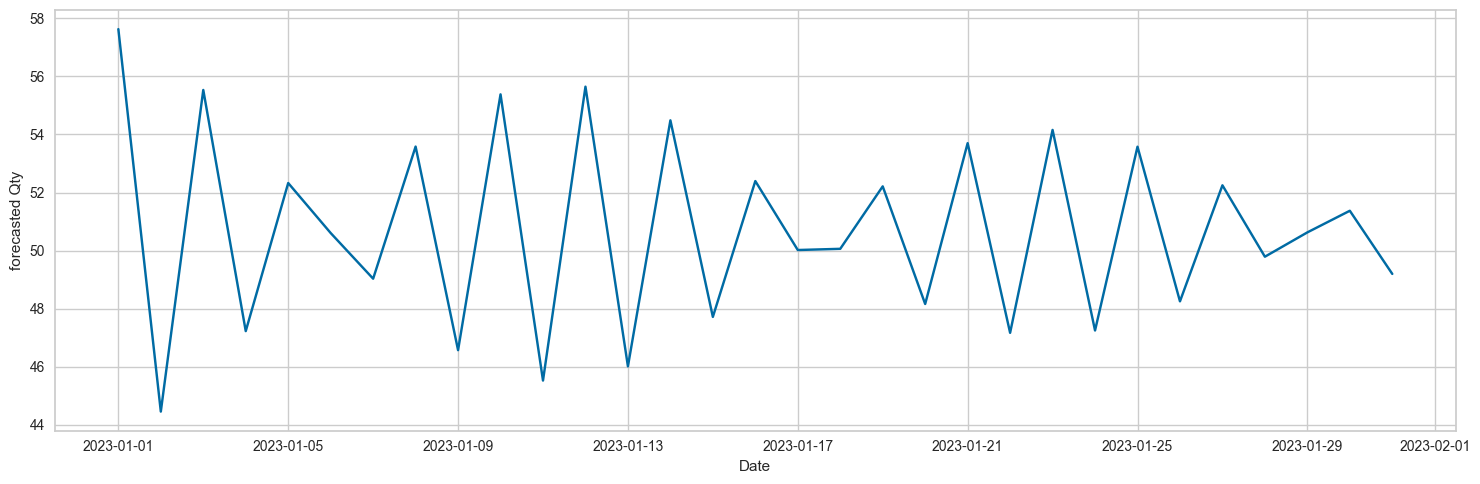

In [278]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(x = 'Date', y = 'forecasted Qty', data = forecast_result_arima)
plt.tight_layout()

# KMeans Clustering

## Data Preparation

### Merge Data

In [279]:
df_cluster = dfMerged.groupby('CustomerID').agg({'TransactionID':'count','Qty':'sum','TotalAmount':'sum'}).reset_index()

df_cluster.head()

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600


### Data Transformation

In [280]:
df_fix = df_cluster.drop('CustomerID', axis = 1)
num_fix = df_fix.columns

df_norm = MinMaxScaler().fit_transform(df_fix)
df_norm = pd.DataFrame(data = df_norm, columns = num_fix)
df_norm.head()

,TransactionID,Qty,TotalAmount
0,0.777778,0.724638,0.703949
1,0.555556,0.681159,0.397827
2,0.666667,0.666667,0.469255
3,0.388889,0.521739,0.278823
4,0.222222,0.246377,0.233899


### Exploratory Data

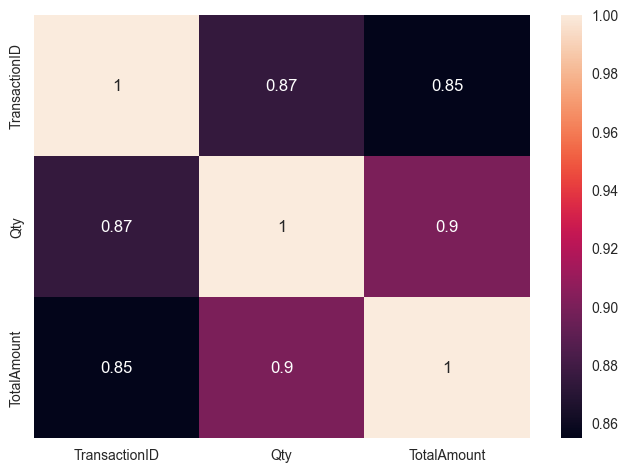

In [281]:
ax = sns.heatmap(df_norm.corr(), annot=True)

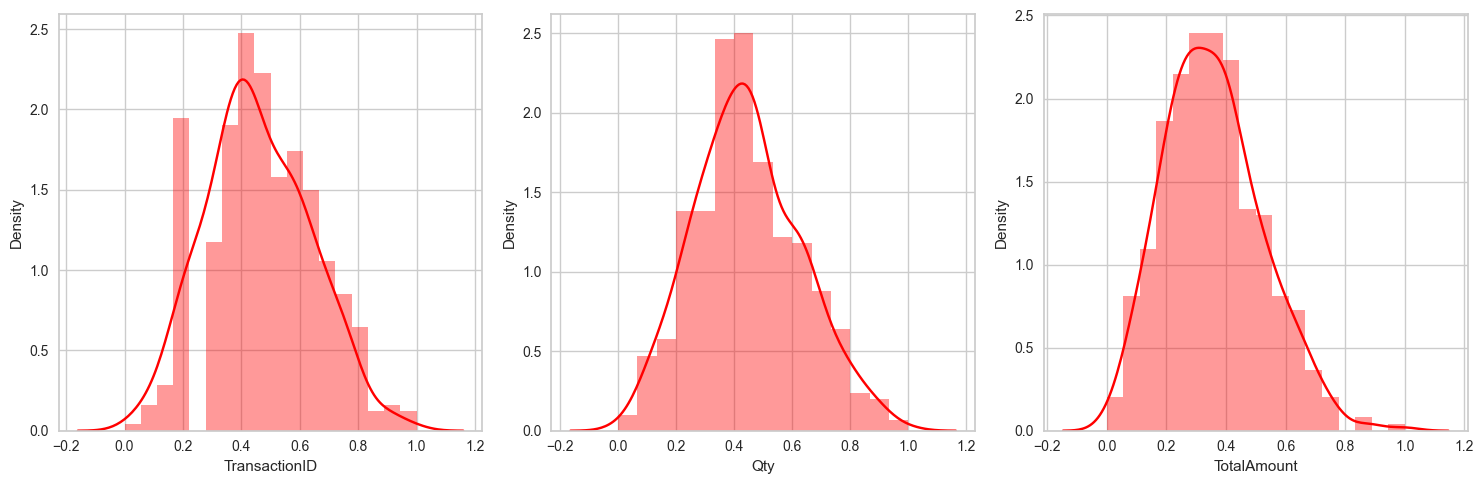

In [282]:
plt.figure(figsize = (15,5))
for i in range(0, len(num_fix)):
  plt.subplot(1, 3, i + 1)
  sns.distplot(df_norm[num_fix[i]], color = 'red')
  plt.xlabel(num_fix[i])
  plt.tight_layout()

In [283]:
statisticDescription(df_norm)

5 Data Sample :
   TransactionID       Qty  TotalAmount
0       0.777778  0.724638     0.703949
1       0.555556  0.681159     0.397827
2       0.666667  0.666667     0.469255
3       0.388889  0.521739     0.278823
4       0.222222  0.246377     0.233899



Information Data :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TransactionID  444 non-null    float64
 1   Qty            444 non-null    float64
 2   TotalAmount    444 non-null    float64
dtypes: float64(3)
memory usage: 10.5 KB
None



Data Shape : 
 (444, 3)



Missing Value Total : 
 TransactionID    0
Qty              0
TotalAmount      0
dtype: int64



Duplicate Value Total : 
 0



Descriptive Statistic :


,TransactionID,Qty,TotalAmount
count,444.000000,444.000000,444.000000
mean,0.455956,0.446697,0.357197
std,0.180164,0.184405,0.165116
min,0.000000,0.000000,0.000000
25%,0.333333,0.318841,0.236649
50%,0.444444,0.434783,0.346011
75%,0.555556,0.579710,0.460708
max,1.000000,1.000000,1.000000


### Determine Cluster K 

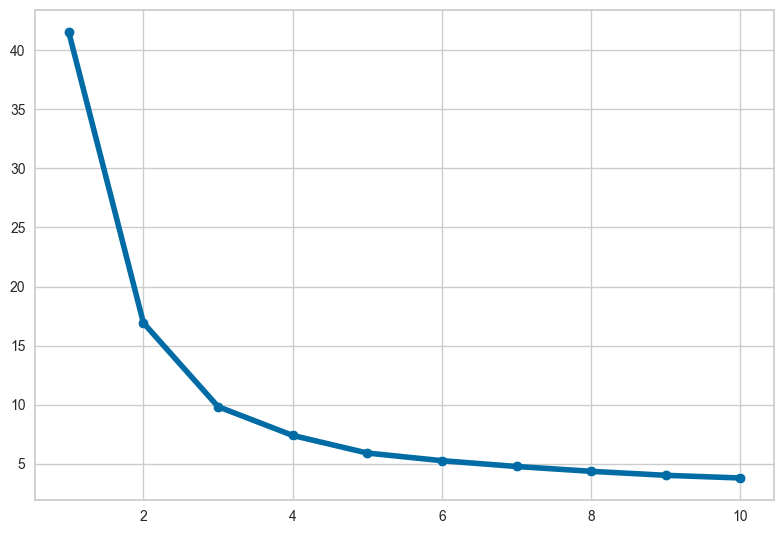

In [284]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(df_norm.values)
    inertia.append(kmeans.inertia_)
    
sns.lineplot(x = range(1,11), y = inertia, linewidth = 4)
sns.scatterplot(x = range(1,11), y = inertia, s = 60)
plt.tight_layout()

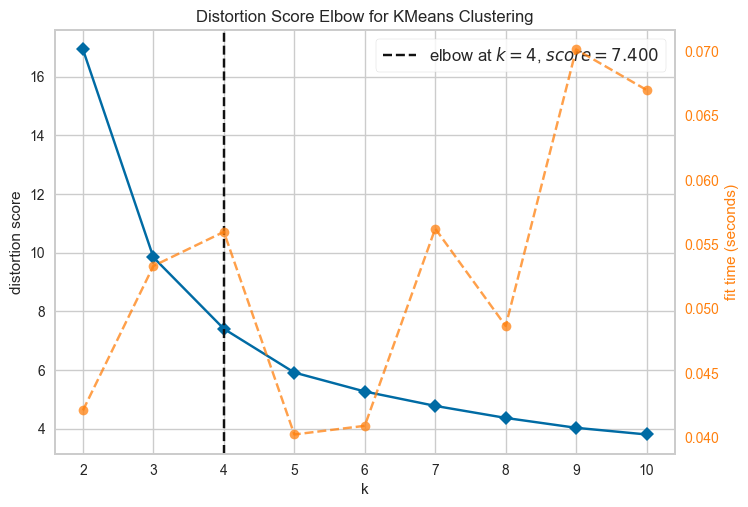

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [285]:
model = KMeans(random_state=42)
checkDistortion = KElbowVisualizer(model, k = (2,11), metric = 'distortion', timings = True, locate_elbow = True)
checkDistortion.fit(df_norm)
checkDistortion.show()

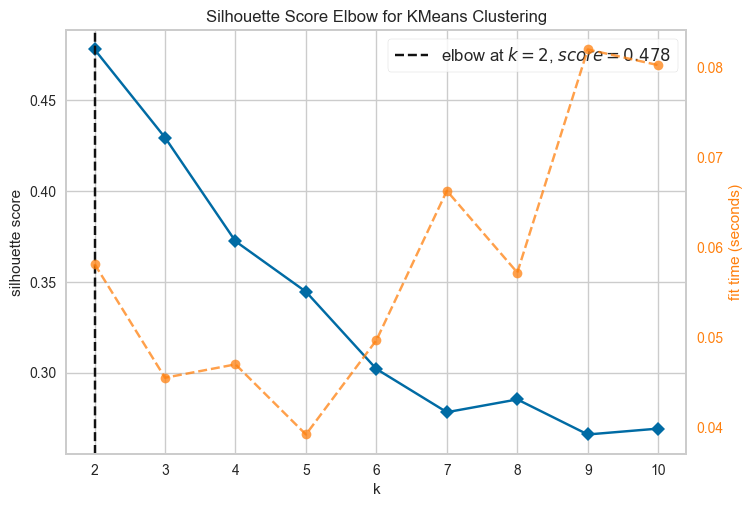

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [286]:
model = KMeans(random_state = 42)
visualizer = KElbowVisualizer(model, k = (2,11), metric = 'silhouette', timings = True, locate_elbow = True)
visualizer.fit(df_norm)
visualizer.show()

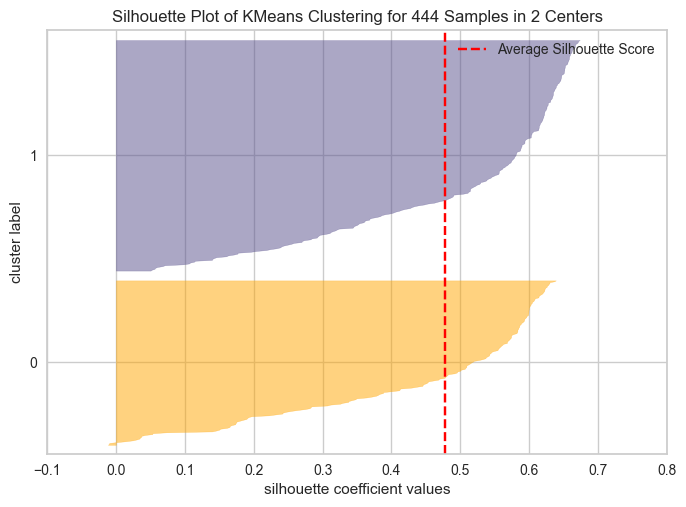

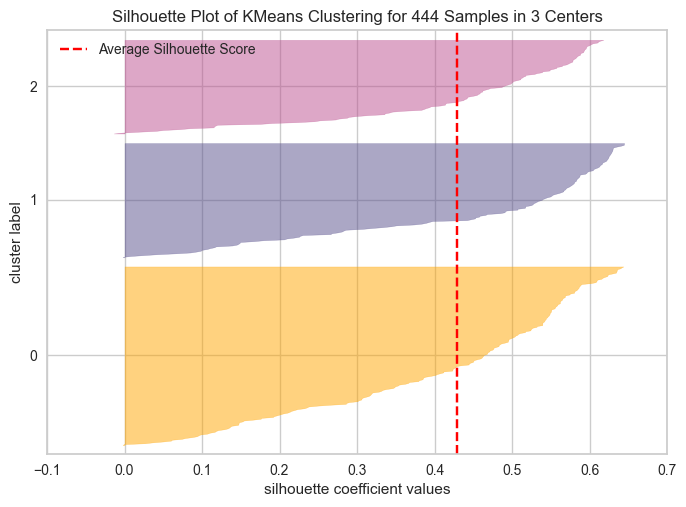

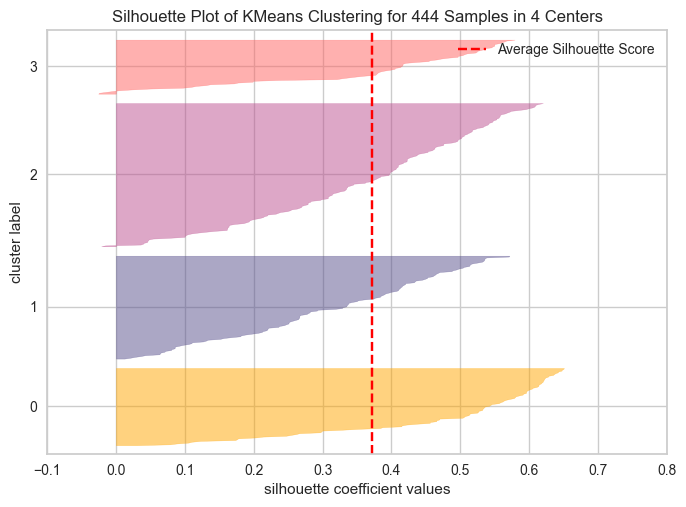

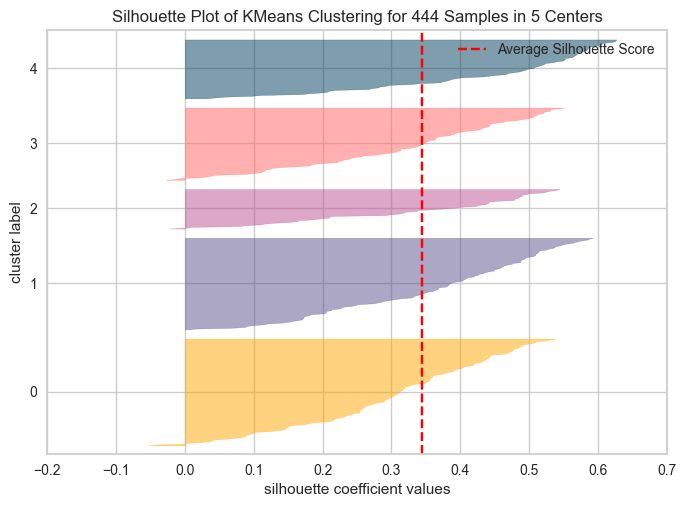

In [287]:
# silhouette plot
from yellowbrick.cluster import SilhouetteVisualizer

for i in range(2,6):
    model = KMeans(i, random_state = 42)
    visualizer = SilhouetteVisualizer(model, colors = ["#ffa600", "#58508d", "#bc5090", "#ff6361", "#003f5c"])
    visualizer.fit(df_norm)
    visualizer.show()

In [288]:
for num_clusters in range(2,6):
    #inisialisasi kmeans
    model_clus = KMeans(n_clusters = num_clusters, max_iter = 1000, random_state = 42)
    model_clus.fit(df_norm)

    cluster_labels = model_clus.labels_

    #shilhouette score
    silhouette_avg = silhouette_score(df_norm, cluster_labels)
    print("For n_clusters = {0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters = 2, the silhouette score is 0.47799278063550654
For n_clusters = 3, the silhouette score is 0.4294669050463297
For n_clusters = 4, the silhouette score is 0.372363651020408
For n_clusters = 5, the silhouette score is 0.34457644236545415


### Train Test Model

In [289]:
kmeans = KMeans(n_clusters = 3, max_iter = 300, random_state = 42)
kmeans.fit(df_norm.values)

KMeans(n_clusters=3, random_state=42)

In [290]:
df_norm['label'] = kmeans.labels_

In [291]:
df_norm.head(10)

,TransactionID,Qty,TotalAmount,label
0,0.777778,0.724638,0.703949,2
1,0.555556,0.681159,0.397827,2
2,0.666667,0.666667,0.469255,2
3,0.388889,0.521739,0.278823,0
4,0.222222,0.246377,0.233899,1
5,0.388889,0.492754,0.486350,0
6,0.777778,0.681159,0.538961,2
7,0.611111,0.536232,0.596342,2
8,0.388889,0.492754,0.340710,0
9,0.222222,0.260870,0.205672,1


### Visualize Data Distribution

In [292]:
X = df_norm.copy().drop(['label'], axis = 1)
Y = df_norm['label'].copy()

In [293]:
scaler = MinMaxScaler()
scaler.fit(X)
X_norm = scaler.transform(X)

In [294]:
pca = PCA()
pca.fit(X_norm)

PCA()

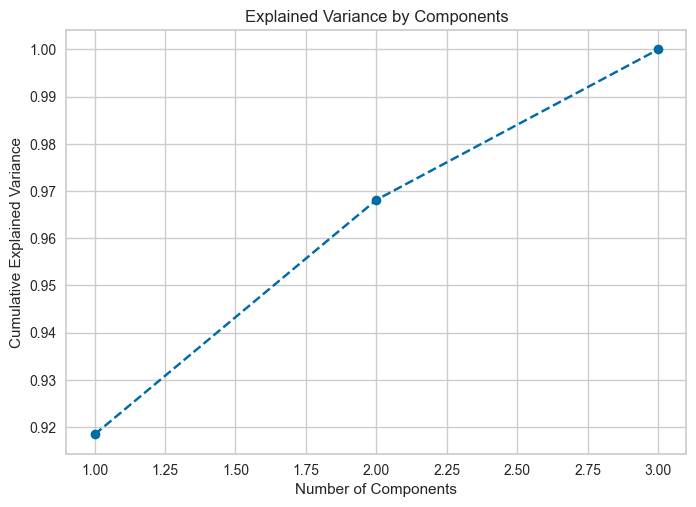

In [295]:
plt.plot(range(1,4), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [296]:
pca = PCA(n_components = 2)
pca.fit(X_norm)
X_pca = pca.transform(X_norm)

df_cluster = pd.DataFrame(X_pca, columns = ['Feature 1', 'Feature 2'])
df_cluster['label'] = Y
df_cluster.sample(10)

,Feature 1,Feature 2,label
405,-0.286502,0.052357,1
53,-0.032767,0.015913,0
343,-0.101664,-0.006691,0
357,-0.214683,0.074746,1
177,-0.403484,0.007638,1
295,0.025377,0.177382,0
333,-0.073609,0.039642,0
27,0.380855,-0.001320,2
65,0.290971,-0.010418,2
414,0.602566,-0.101438,2


In [297]:
df_cluster['label'].value_counts()

label
0    205
1    131
2    108
Name: count, dtype: int64

In [298]:
df_cluster.describe()

,Feature 1,Feature 2,label
count,4.440000e+02,4.440000e+02,444.000000
mean,1.000201e-17,-1.550311e-17,0.781532
std,2.933966e-01,6.825506e-02,0.811610
min,-7.300500e-01,-2.268073e-01,0.000000
25%,-1.982330e-01,-4.432711e-02,0.000000
50%,-2.047985e-02,-7.018804e-04,1.000000
75%,1.895775e-01,4.393902e-02,1.000000
max,9.318980e-01,2.437358e-01,2.000000


In [299]:
df_cluster.groupby('label').agg(['mean', 'median', 'std', 'count'])

Feature 1                           Feature 2                          
           mean    median       std count      mean    median       std count
label                                                                        
0      0.002600 -0.006012  0.099359   205  0.001562  0.002224  0.070483   205
1     -0.332797 -0.320701  0.125496   131 -0.000553 -0.003296  0.057070   131
2      0.398736  0.351884  0.149507   108 -0.002294  0.000799  0.076480   108

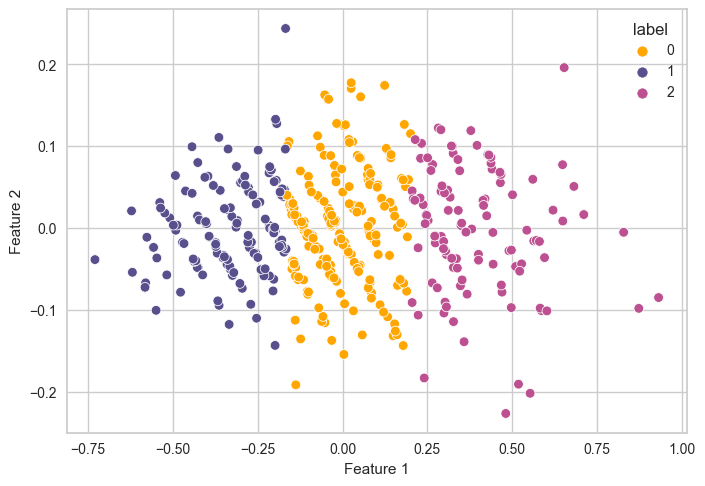

In [300]:
sns.scatterplot(data = df_cluster, x = 'Feature 1', y = 'Feature 2', hue = 'label', palette=["#ffa600", "#58508d", "#bc5090", "#ff6361", "#003f5c"])
plt.show()

In [301]:
df_fix['cluster'] = kmeans.labels_
df_fix.groupby('cluster').agg(['count','mean', 'median', 'std'])

TransactionID                               Qty                    \
                count       mean median       std count       mean median   
cluster                                                                     
0                 205  11.253659   11.0  1.502954   205  41.004878   41.0   
1                 131   7.702290    8.0  1.694764   131  26.725191   27.0   
2                 108  15.370370   15.0  1.790904   108  57.574074   57.0   

                  TotalAmount                                         
              std       count           mean    median           std  
cluster                                                               
0        5.197565         205  360908.292683  361100.0  54590.720316  
1        5.844200         131  228550.381679  233800.0  52910.854454  
2        7.118757         108  524466.666667  511150.0  82114.803383

In [302]:
df_fix.describe().T

,count,mean,std,min,25%,50%,75%,max
TransactionID,444.0,11.207207,3.242960,3.0,9.0,11.0,13.0,21.0
Qty,444.0,40.822072,12.723926,10.0,32.0,40.0,50.0,79.0
TotalAmount,444.0,361641.216216,124596.157539,92100.0,270675.0,353200.0,439750.0,846700.0
cluster,444.0,0.781532,0.811610,0.0,0.0,1.0,1.0,2.0


In [303]:
cluster_count = df_fix['cluster'].value_counts().reset_index()
cluster_count.columns = ['cluster', 'count']
cluster_count['percentage (%)'] = round((cluster_count['count']/len(df_fix))*100,2)
cluster_count = cluster_count.sort_values(by = ['cluster']).reset_index(drop = True)
cluster_count

,cluster,count,percentage (%)
0,0,205,46.17
1,1,131,29.50
2,2,108,24.32


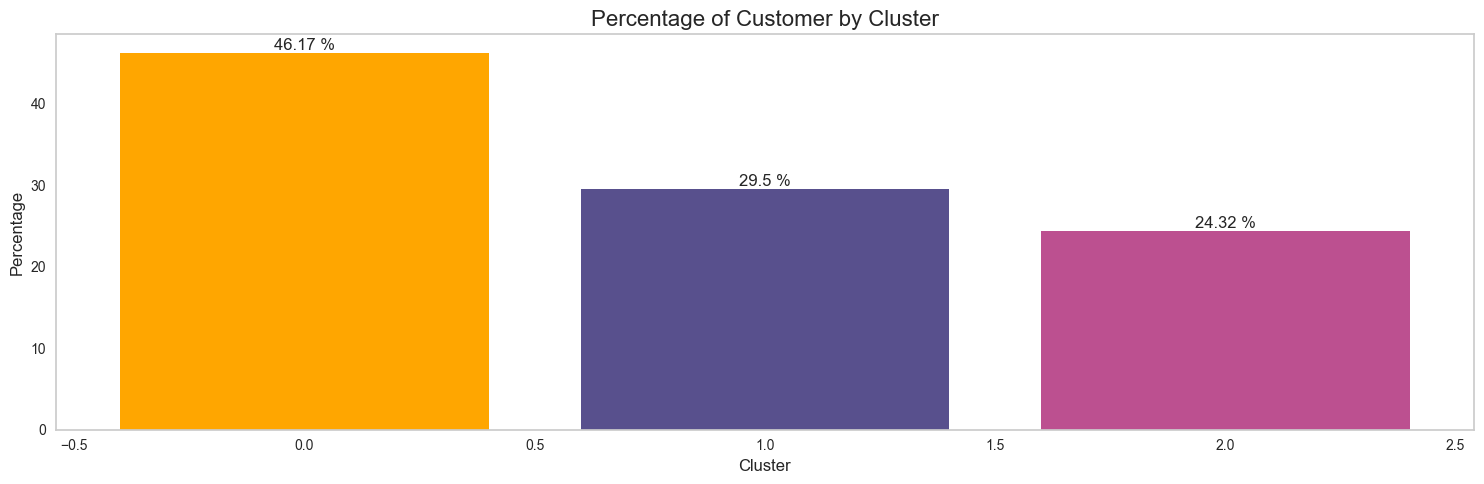

In [304]:
fig, ax = plt.subplots(figsize = (15,5))

charts = plt.bar(x = cluster_count['cluster'], height = cluster_count['percentage (%)'], color = ["#ffa600", "#58508d", "#bc5090", "#ff6361", "#003f5c"])

for chart in charts:
  height = chart.get_height()
  label_x_pos = chart.get_x() + chart.get_width() / 2
  ax.text(label_x_pos, height, s = f'{height} %', ha='center',
  va = 'bottom')

plt.title('Percentage of Customer by Cluster', fontsize = 16)
plt.xlabel('Cluster',fontsize = 12)
plt.ylabel('Percentage',fontsize = 12)
plt.style.use('tableau-colorblind10')
plt.grid(False)
plt.tight_layout()

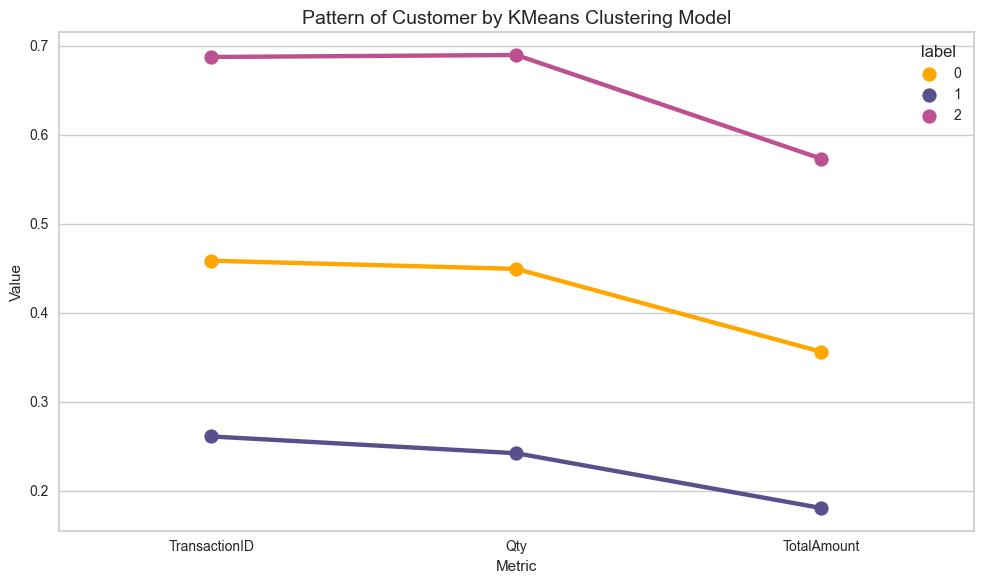

In [305]:
cluster_med = df_norm.groupby('label').mean().reset_index()

df_melt = pd.melt(cluster_med.reset_index(), id_vars='label', value_vars = num_fix, var_name = 'Metric', value_name = 'Value')

plt.figure(figsize=(10,6))
sns.pointplot(data = df_melt, x = 'Metric', y = 'Value', hue = 'label', palette = ["#ffa600", "#58508d", "#bc5090", "#ff6361", "#003f5c"])
plt.title('Pattern of Customer by KMeans Clustering Model', fontsize = 14)
plt.xlabel('Metric')
plt.ylabel('Value')
plt.tight_layout()

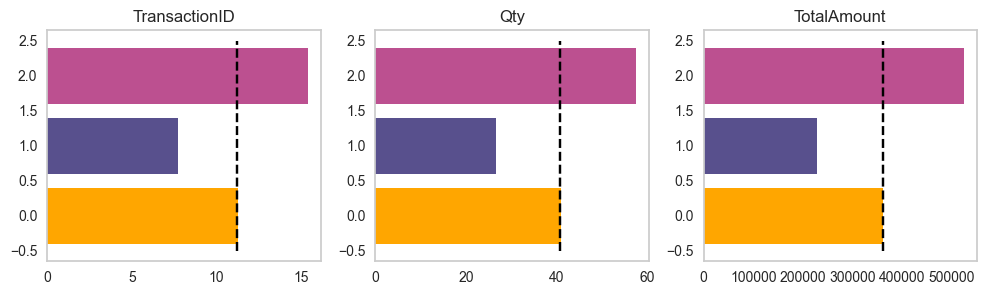

In [306]:
plt.figure(figsize = [len(num_fix)*4,3])
i = 1
for col in num_fix:
    ax = plt.subplot(1,len(num_fix),i)
    ax.vlines(df_fix[col].mean(), ymin = -0.5, ymax = 2.5, color = 'black', linestyle='--')
    g = df_fix.groupby('cluster')
    x = g[col].mean().index
    y = g[col].mean().values
    ax.barh(x,y, color = ["#ffa600", "#58508d", "#bc5090", "#ff6361", "#003f5c"])
    plt.title(col)
    plt.grid(False)
    i = i+1

In [307]:
df_fix.groupby('cluster').agg(['min', 'max', 'mean']).reset_index(drop = True).T

0              1              2
TransactionID min        7.000000       3.000000      11.000000
              max       15.000000      13.000000      21.000000
              mean      11.253659       7.702290      15.370370
Qty           min       30.000000      10.000000      44.000000
              max       54.000000      39.000000      79.000000
              mean      41.004878      26.725191      57.574074
TotalAmount   min   233600.000000   92100.000000  365000.000000
              max   516600.000000  329300.000000  846700.000000
              mean  360908.292683  228550.381679  524466.666667